In [3]:
#37% rule
#This algorithm is set to solve the secretary problem.
#this is a subset of problems concerned with 'which is the best place to stop' 
# "Imagine you are interviewing a set of applicants for a position as secretary,and your goal is to maximise the chance of hiring the single best applicant from the pool.
# the rules are simple, we cannot know what qualifies someone as best, only a numerical rank relative to others. At any time we can give an offer to the current applicant and they are guaranteed to accept, ending the search, additionally, any applicants who are passed over, cannot be offered.

In [4]:
#we will perform a few strategies before fitting the most optimal, named the 'look then leap' strategy
#First we should set up our data.

In [5]:
#here is our list of applicants, with a name and a rank.

In [2]:
import numpy as np
import names as ns
import random
import pandas as pd
import Strategies as stg
import matplotlib as mp
from matplotlib import pyplot as plt
import json

In [3]:
def report(strat_list):
    plt.hist(strat_list, density=True, bins = 100)
    best_rank = min(strat_list)
    print("Frequency of best result:", round((strat_list.count(1)/len(strat_list)*100), 2))

In [3]:
best_of_three_winners = []
for i in range(0,999):
    try:
        x = stg.best_of_three()
        best_of_three_winners.append(x)
    except:
        pass

In [5]:
best_of_two_winners = []
for i in range(0,999):
    try:
        x = stg.best_of_two()
        best_of_two_winners.append(x)
    except:
        pass


Frequency of best result: 14.99


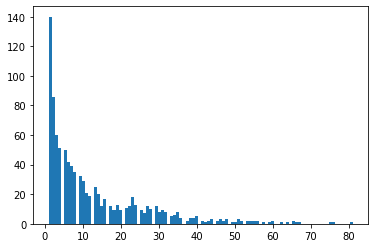

In [10]:
report(best_of_two_winners)

Frequency of best result: 22.68


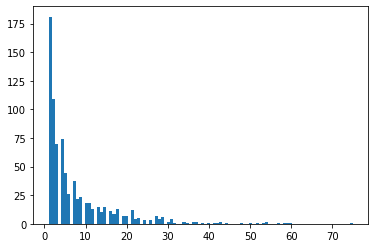

In [12]:
report(best_of_three_winners)

In [3]:
best_of_leap_winners = []
for i in range(0,999):
    try:
        x = stg.look_leap(37, 100)
        best_of_leap_winners.append(x)
    except:
        pass

Frequency of best result: 36.9


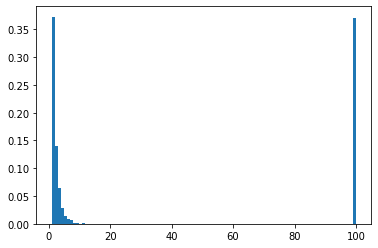

In [4]:
report(best_of_leap_winners)

In [3]:
#graph to show the probability of the nth candidate being the best
def pcbest(n, list):
    pc = (1/len(list[:(list.index(n)+1)]))*100
    return pc


In [13]:
range1 = range(0,100)

In [14]:
lst1 = list(range1)

In [3]:
percentages = []

In [6]:
for i in range(1,101):
    result = pcbest(i,lst1)
    percentages.append(result)

In [3]:
import random
random.shuffle(candidate_ord_pool = [i for i in range(0,10)])
cand = 0
for i in candidate_ord_pool:
    print(i)
    



TypeError: shuffle() got an unexpected keyword argument 'candidate_ord_pool'

Text(0.5, 1.0, 'Raw % chance of being the best applicant seen so far')

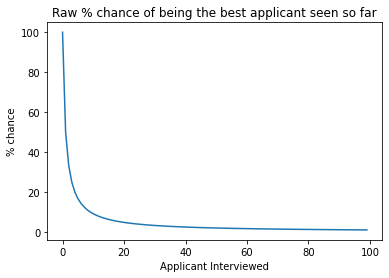

In [12]:
plt.plot(percentages)
plt.xlabel("Applicant Interviewed")
plt.ylabel("% chance")
plt.title("Raw % chance of being the best applicant seen so far")

In [4]:
def success_finder(func, max_passes, steps, stop):
    success_list = []
    success_finder.passes = list(range(steps,max_passes+steps, steps)) # create a list with a range between 0 and the max_nr stated, incrementing in steps of 'steps' passed from func
    for a in success_finder.passes:
        if a > 0:
            results = []
            for y in range(0,100): #do below 100 times
                z = func(stop = stop, list_len = a)
                results.append(z)

            
            success_list.append(results)
        else:
            pass
    print("finish at pass, iteration", a, y)
    return success_list



    

In [5]:
success_rate_leap = success_finder(stg.look_leap, max_passes= 10000, steps = 100, stop= 37)


finish at pass, iteration 10000 99


In [8]:
import csv

with open("out.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerows(success_rate_leap)

In [9]:
d = dict(zip(success_finder.passes, success_rate_leap))


In [10]:
df = pd.DataFrame(d)

In [13]:
df.

,100,200,300,400,500,600,700,800,900,1000,...,9100,9200,9300,9400,9500,9600,9700,9800,9900,10000
0,0,1,0,1,0,100,0,2,0,100,...,1,0,3,4,100,0,1,0,5,0
1,0,0,2,100,0,100,100,3,1,0,...,100,0,1,0,2,100,0,100,100,1
2,100,0,0,2,100,0,100,100,100,0,...,100,100,1,0,100,1,1,4,0,0
3,0,4,0,100,0,100,1,0,100,100,...,100,100,0,0,100,1,0,100,0,2
4,1,1,0,0,100,100,0,100,0,100,...,1,0,100,1,100,100,0,4,0,0


In [11]:
pc_dict = {}
for i in df:
    pc_dict[str(i)] = (df[i] == 0).sum()

    

In [20]:
pc_dict

{'100': 40,
 '200': 33,
 '300': 40,
 '400': 29,
 '500': 37,
 '600': 43,
 '700': 35,
 '800': 43,
 '900': 39,
 '1000': 34,
 '1100': 38,
 '1200': 32,
 '1300': 46,
 '1400': 44,
 '1500': 27,
 '1600': 34,
 '1700': 28,
 '1800': 39,
 '1900': 42,
 '2000': 39,
 '2100': 33,
 '2200': 35,
 '2300': 38,
 '2400': 35,
 '2500': 38,
 '2600': 41,
 '2700': 38,
 '2800': 36,
 '2900': 41,
 '3000': 37,
 '3100': 42,
 '3200': 42,
 '3300': 34,
 '3400': 34,
 '3500': 31,
 '3600': 40,
 '3700': 39,
 '3800': 40,
 '3900': 34,
 '4000': 33,
 '4100': 35,
 '4200': 32,
 '4300': 41,
 '4400': 38,
 '4500': 35,
 '4600': 30,
 '4700': 34,
 '4800': 35,
 '4900': 37,
 '5000': 26,
 '5100': 41,
 '5200': 35,
 '5300': 37,
 '5400': 42,
 '5500': 29,
 '5600': 37,
 '5700': 37,
 '5800': 39,
 '5900': 37,
 '6000': 38,
 '6100': 36,
 '6200': 34,
 '6300': 31,
 '6400': 38,
 '6500': 34,
 '6600': 26,
 '6700': 36,
 '6800': 37,
 '6900': 37,
 '7000': 32,
 '7100': 36,
 '7200': 33,
 '7300': 36,
 '7400': 37,
 '7500': 41,
 '7600': 32,
 '7700': 28,
 '7800':

In [24]:
pd.DataFrame(pc_dict, index = list(range(0, len(pc_dict)))).to_csv("percentage_success.csv")

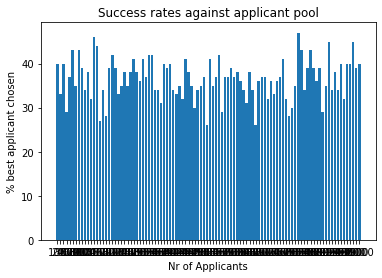

In [12]:
names = list(pc_dict.keys())
values = list(pc_dict.values())

plt.bar(range(len(pc_dict)), values, tick_label=names)
plt.xlabel("Nr of Applicants")
plt.ylabel("% best applicant chosen")
plt.title("Success rates against applicant pool")
plt.show()

In [26]:
#-------------

In [1]:
names

NameError: name 'names' is not defined

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

def run_best_of_n_for_different_pool_lens(stops, pool_lens, trials, best_of_n_func):
    # Initialize counters for the number of times the best candidate is chosen and the total number of trials
    best_candidate_count = np.zeros(len(pool_lens))
    total_trials = 0

    # Run the strategy for different pool lengths and stopping points
    for i in range(len(pool_lens)):
        for j in range(trials):
            for stop in stops:
                if best_of_n_func(stop, [pool_lens[i]]):
                    best_candidate_count[i] += 1
            total_trials += len(stops)

    # Compute the percentage of times the best candidate was chosen
    best_candidate_percentage = 100 * best_candidate_count / total_trials

    # Create the interactive graph
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=pool_lens, y=best_candidate_percentage, name='Percentage of times the best candidate was chosen'), secondary_y=False)
    fig.update_layout(title='Best Candidate Percentage for Different Pool Lengths and Stopping Points',
                      xaxis_title='Pool Length',
                      yaxis_title='Best Candidate Percentage',
                      yaxis2=dict(title='Percentage', overlaying='y', side='right'))

    # Add sliders for pool_len and stop values
    fig.update_layout(
        sliders=[
            dict(
                active=len(pool_lens) - 1,
                currentvalue={"prefix": "Pool Length: "},
                pad={"t": 50},
                steps=[{"label": str(pl), "method": "update", "args": [{"visible": [i == j for j in range(len(pool_lens))]},{"title": "Best Candidate Percentage for Different Pool Lengths and Stopping Points", "xaxis": {"title": "Pool Length"}, "yaxis": {"title": "Best Candidate Percentage"}}]} for i, pl in enumerate(pool_lens)],
            ),
            dict(
                active=len(stops) - 1,
                currentvalue={"prefix": "Stop: "},
                pad={"t": 50},
                steps=[{"label": str(s), "method": "update", "args": [{"y": [best_candidate_percentage if k == 0 else [best_of_n_func(s, [pl])*100/total_trials if j == i else y for j, y in enumerate(best_candidate_percentage)] for k, pl in enumerate(pool_lens)]},{"title": "Best Candidate Percentage for Different Pool Lengths and Stopping Points", "xaxis": {"title": "Pool Length"}, "yaxis": {"title": "Best Candidate Percentage"}}]} for i, s in enumerate(stops)]
            )
            ]
    )

    fig.show()
